In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import gc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import re
from keras.preprocessing import text, sequence 
from keras import models, layers
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/0.Projects/Korean Language Models/petition.csv', encoding='utf-8')

In [4]:
df.head()

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [0]:
df = df.loc[:, ['category' ,'title', 'content']]

In [6]:
df.head()

,category,title,content
0,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [0]:
df = df.drop_duplicates()

In [8]:
df.shape

(384337, 3)

In [9]:
df.head()

,category,title,content
0,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
5,보건복지,보건복지부 부령 제339호중 “특수의료장비 운영에 관한 규칙” 중 불합리한 행정제...,청원인 왕 기 운\n서울 도봉구 창동 삼성아파트 101-1103호\n청원취지\n보...


In [0]:
x_train, x_test, y_train, y_test = train_test_split(df[['title', 'content']], df['category'], train_size=50000, stratify=df['category'], random_state=1228)

(50000, 2)
(50000,)


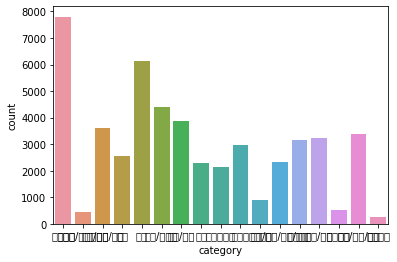

In [11]:
print(x_train.shape)
print(y_train.shape)
sns.countplot(y_train)

In [12]:
x_train.reset_index(drop=True, inplace=True)
x_train.head()

,title,content
0,제발 국회의원도 무노동무입긍 해주세요,아니 왜 일반 국민들말 무노동무입급금이도는지 모르겠네요\n그 법을 만든 국회의...
1,지키려는 법을 만들지 말고 국민이 공감할수 있는 법을 다시 개정해야합니다.,조합만들게한 옛날 법들 전부 없애고 다시 법을\n개정해서 시행해라.제대로된 법을 만...
2,저출산대책을 이렇게 변경합시다.,언제까지 늙은 여자들이 결혼해서 애 낳기 만을 기다릴 겁니까? 또 언제까지 취업타령...
3,“1가구 1주택자”는 모두 죄인입니까?,"서울에서 직장 다니다가, 2001년 직장을 먼 지방으로 옮기게 되어 서울 집을 전세..."
4,가상화폐 거래소 폐쇄 절대 불가,거래소 폐쇄시 문재인 대통령 탄핵 운동 가겠습니다


In [13]:
y_train.reset_index(drop=True, inplace=True)
y_train.head()

0         정치개혁
1         정치개혁
2    저출산/고령화대책
3     교통/건축/국토
4           행정
Name: category, dtype: object

In [0]:
df = pd.concat([x_train, y_train], axis=1)

In [15]:
df.head()

,title,content,category
0,제발 국회의원도 무노동무입긍 해주세요,아니 왜 일반 국민들말 무노동무입급금이도는지 모르겠네요\n그 법을 만든 국회의...,정치개혁
1,지키려는 법을 만들지 말고 국민이 공감할수 있는 법을 다시 개정해야합니다.,조합만들게한 옛날 법들 전부 없애고 다시 법을\n개정해서 시행해라.제대로된 법을 만...,정치개혁
2,저출산대책을 이렇게 변경합시다.,언제까지 늙은 여자들이 결혼해서 애 낳기 만을 기다릴 겁니까? 또 언제까지 취업타령...,저출산/고령화대책
3,“1가구 1주택자”는 모두 죄인입니까?,"서울에서 직장 다니다가, 2001년 직장을 먼 지방으로 옮기게 되어 서울 집을 전세...",교통/건축/국토
4,가상화폐 거래소 폐쇄 절대 불가,거래소 폐쇄시 문재인 대통령 탄핵 운동 가겠습니다,행정


In [16]:
pd.get_dummies(df['category']).head()

,경제민주화,교통/건축/국토,기타,농산어촌,문화/예술/체육/언론,미래,반려동물,보건복지,성장동력,안전/환경,외교/통일/국방,육아/교육,인권/성평등,일자리,저출산/고령화대책,정치개혁,행정
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
le = LabelEncoder()

df['category_le'] = le.fit_transform(df['category'])

In [18]:
le.classes_

array(['경제민주화', '교통/건축/국토', '기타', '농산어촌', '문화/예술/체육/언론', '미래', '반려동물',
       '보건복지', '성장동력', '안전/환경', '외교/통일/국방', '육아/교육', '인권/성평등', '일자리',
       '저출산/고령화대책', '정치개혁', '행정'], dtype=object)

In [0]:
# 행정, 정치개혁, 경제민주화, 외교/통일/국방

# 교통/건축/국토, 안전/환경

# 보건복지, 저출산/고령화대책, 육아/교육

# 기타

# 성장동력, 미래, 농산어촌, 일자리

# 문화/예술/체육/언론, 반려동물, 인권,성평등

In [0]:
# multi_label = np.empty(shape = (df.shape[0], 5))

# multi_label

In [0]:
# test_df = df.iloc[:5, :]

In [0]:
# test_df.head()

In [23]:
multi_label_df = pd.get_dummies(df['category'])

print(multi_label_df.shape)
multi_label_df.head()

(50000, 17)


,경제민주화,교통/건축/국토,기타,농산어촌,문화/예술/체육/언론,미래,반려동물,보건복지,성장동력,안전/환경,외교/통일/국방,육아/교육,인권/성평등,일자리,저출산/고령화대책,정치개혁,행정
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [24]:
multi_label_df.values

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

In [25]:
multi_label_df.values.shape

(50000, 17)

In [26]:
multi_label_df.iloc[0, :]

경제민주화          0
교통/건축/국토       0
기타             0
농산어촌           0
문화/예술/체육/언론    0
미래             0
반려동물           0
보건복지           0
성장동력           0
안전/환경          0
외교/통일/국방       0
육아/교육          0
인권/성평등         0
일자리            0
저출산/고령화대책      0
정치개혁           1
행정             0
Name: 0, dtype: uint8

In [0]:
if np.argmax(multi_label_df.iloc[0, :]) in ['교통/건축/국토', '안전/환경']:
  multi_label_df.loc[0, ['교통/건축/국토', '안전/환경']] = 1

In [28]:
multi_label_df.iloc[0, :]

경제민주화          0
교통/건축/국토       0
기타             0
농산어촌           0
문화/예술/체육/언론    0
미래             0
반려동물           0
보건복지           0
성장동력           0
안전/환경          0
외교/통일/국방       0
육아/교육          0
인권/성평등         0
일자리            0
저출산/고령화대책      0
정치개혁           1
행정             0
Name: 0, dtype: uint8

## Create Multi label 

In [0]:
if np.argmax(multi_label_df.loc[0, '경제민주화': '행정']) in ['교통/건축/국토', '안전/환경']:
    multi_label_df.loc[i, ['교통/건축/국토', '안전/환경']] = 1

In [30]:
np.argmax(multi_label_df.loc[0, '경제민주화': '행정'])

'정치개혁'

In [31]:
np.argmax(multi_label_df.loc[0, '경제민주화': '행정']) in ['교통/건축/국토', '안전/환경']

False

In [32]:
np.argmax(multi_label_df.iloc[0, :])

'정치개혁'

In [0]:
if np.argmax(multi_label_df.iloc[0, :]) in ['행정', '정치개혁', '경제민주화', '외교/통일/국방']:
  multi_label_df.iloc[0, [16, 15, 0, 12]] = 1

In [34]:
multi_label_df.iloc[0, :]

경제민주화          1
교통/건축/국토       0
기타             0
농산어촌           0
문화/예술/체육/언론    0
미래             0
반려동물           0
보건복지           0
성장동력           0
안전/환경          0
외교/통일/국방       0
육아/교육          0
인권/성평등         1
일자리            0
저출산/고령화대책      0
정치개혁           1
행정             1
Name: 0, dtype: int64

In [35]:
multi_label_df.columns

Index(['경제민주화', '교통/건축/국토', '기타', '농산어촌', '문화/예술/체육/언론', '미래', '반려동물', '보건복지',
       '성장동력', '안전/환경', '외교/통일/국방', '육아/교육', '인권/성평등', '일자리', '저출산/고령화대책',
       '정치개혁', '행정'],
      dtype='object')

In [36]:
multi_label_df.shape

(50000, 17)

In [0]:
# '경제민주화', '교통/건축/국토', '기타', '농산어촌', '문화/예술/체육/언론', '미래', '반려동물',
# '보건복지', '성장동력', '안전/환경', '외교/통일/국방', '육아/교육', '인권/성평등', '일자리',
# '저출산/고령화대책', '정치개혁', '행정'

# -------------------------------------------------------------------------------------------- #

# 행정, 정치개혁, 경제민주화, 외교/통일/국방
# 교통/건축/국토, 안전/환경
# 보건복지, 저출산/고령화대책, 육아/교육
# 기타
# 성장동력, 미래, 농산어촌, 일자리
# 문화/예술/체육/언론, 반려동물, 인권/성평등


# multi_label_df = pd.get_dummies(df['category'])

# for i in range(multi_label_df.shape[0]):
#   if np.argmax(multi_label_df.iloc[i, :]) in ['교통/건축/국토', '안전/환경']:
#     multi_label_df.iloc[i, [1, 9]] = 1
#   elif np.argmax(multi_label_df.iloc[i, :]) in ['행정', '정치개혁', '경제민주화', '외교/통일/국방']:
#     multi_label_df.iloc[i, [16, 15, 0, 12]] = 1
#   elif np.argmax(multi_label_df.iloc[i, :]) in ['보건복지', '저출산/고령화대책', '육아/교육']:
#     multi_label_df.iloc[i, [7, 14, 11]] = 1
#   elif np.argmax(multi_label_df.iloc[i, :]) in ['성장동력', '미래', '농산어촌', '일자리']:
#     multi_label_df.iloc[i, [8, 5, 3, 13]] = 1 
#   elif np.argmax(multi_label_df.iloc[i, :]) in ['문화/예술/체육/언론', '반려동물', '인권/성평등']:
#     multi_label_df.iloc[i, [4, 6, 12]] = 1
#   elif np.argmax(multi_label_df.iloc[i, :]) in ['기타']:
#     multi_label_df.iloc[i, 2] = 1  
    
    
  



In [0]:
def multi_label(x):
  if np.argmax(x) in ['교통/건축/국토', '안전/환경']:
    x[['교통/건축/국토', '안전/환경']] = 1
    return x
  
  elif np.argmax(x) in ['행정', '정치개혁', '경제민주화', '외교/통일/국방']:
    x[['행정', '정치개혁', '경제민주화', '외교/통일/국방']] = 1
    return x
  
  elif np.argmax(x) in ['보건복지', '저출산/고령화대책', '육아/교육']:
    x[['보건복지', '저출산/고령화대책', '육아/교육']] = 1
    return x
  
  elif np.argmax(x) in ['성장동력', '미래', '농산어촌', '일자리']:
    x[['성장동력', '미래', '농산어촌', '일자리']] = 1
    return x
  elif np.argmax(x) in ['문화/예술/체육/언론', '반려동물', '인권/성평등']:
    x[['문화/예술/체육/언론', '반려동물', '인권/성평등']] = 1
    return x
  elif np.argmax(x) in ['기타']:
    x['기타'] = 1 
    return x

In [38]:
multi_label_df.iloc[-22, :]

경제민주화          0
교통/건축/국토       0
기타             0
농산어촌           0
문화/예술/체육/언론    0
미래             0
반려동물           0
보건복지           1
성장동력           0
안전/환경          0
외교/통일/국방       0
육아/교육          0
인권/성평등         0
일자리            0
저출산/고령화대책      0
정치개혁           0
행정             0
Name: 49978, dtype: int64

In [39]:
multi_label(multi_label_df.iloc[-22, :])

경제민주화          0
교통/건축/국토       0
기타             0
농산어촌           0
문화/예술/체육/언론    0
미래             0
반려동물           0
보건복지           1
성장동력           0
안전/환경          0
외교/통일/국방       0
육아/교육          1
인권/성평등         0
일자리            0
저출산/고령화대책      1
정치개혁           0
행정             0
Name: 49978, dtype: int64

In [0]:
multi_label_df = pd.get_dummies(df['category'])

In [0]:
for i in range(multi_label_df.shape[0]):
  multi_label_df.iloc[i, :] = multi_label(multi_label_df.iloc[i, :])

In [42]:
multi_label_df

,경제민주화,교통/건축/국토,기타,농산어촌,문화/예술/체육/언론,미래,반려동물,보건복지,성장동력,안전/환경,외교/통일/국방,육아/교육,인권/성평등,일자리,저출산/고령화대책,정치개혁,행정
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
49996,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
49997,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
49998,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [43]:
multi_label_df.shape

(50000, 17)

In [44]:
multi_label_df.values

array([[1, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 0]])

In [45]:
multi_label_df.shape

(50000, 17)

In [53]:
df.head()

,title,content,category,category_le
0,제발 국회의원도 무노동무입긍 해주세요,아니 왜 일반 국민들말 무노동무입급금이도는지 모르겠네요\n그 법을 만든 국회의...,정치개혁,15
1,지키려는 법을 만들지 말고 국민이 공감할수 있는 법을 다시 개정해야합니다.,조합만들게한 옛날 법들 전부 없애고 다시 법을\n개정해서 시행해라.제대로된 법을 만...,정치개혁,15
2,저출산대책을 이렇게 변경합시다.,언제까지 늙은 여자들이 결혼해서 애 낳기 만을 기다릴 겁니까? 또 언제까지 취업타령...,저출산/고령화대책,14
3,“1가구 1주택자”는 모두 죄인입니까?,"서울에서 직장 다니다가, 2001년 직장을 먼 지방으로 옮기게 되어 서울 집을 전세...",교통/건축/국토,1
4,가상화폐 거래소 폐쇄 절대 불가,거래소 폐쇄시 문재인 대통령 탄핵 운동 가겠습니다,행정,16


In [0]:
df['full_txt'] = df['title'] + ' ' + df['content']

In [55]:
df.head()

,title,content,category,category_le,full_txt
0,제발 국회의원도 무노동무입긍 해주세요,아니 왜 일반 국민들말 무노동무입급금이도는지 모르겠네요\n그 법을 만든 국회의...,정치개혁,15,제발 국회의원도 무노동무입긍 해주세요 아니 왜 일반 국민들말 무노동무입급금이도...
1,지키려는 법을 만들지 말고 국민이 공감할수 있는 법을 다시 개정해야합니다.,조합만들게한 옛날 법들 전부 없애고 다시 법을\n개정해서 시행해라.제대로된 법을 만...,정치개혁,15,지키려는 법을 만들지 말고 국민이 공감할수 있는 법을 다시 개정해야합니다. 조합만들...
2,저출산대책을 이렇게 변경합시다.,언제까지 늙은 여자들이 결혼해서 애 낳기 만을 기다릴 겁니까? 또 언제까지 취업타령...,저출산/고령화대책,14,저출산대책을 이렇게 변경합시다. 언제까지 늙은 여자들이 결혼해서 애 낳기 만을 기다...
3,“1가구 1주택자”는 모두 죄인입니까?,"서울에서 직장 다니다가, 2001년 직장을 먼 지방으로 옮기게 되어 서울 집을 전세...",교통/건축/국토,1,"“1가구 1주택자”는 모두 죄인입니까? 서울에서 직장 다니다가, 2001년 직장을 ..."
4,가상화폐 거래소 폐쇄 절대 불가,거래소 폐쇄시 문재인 대통령 탄핵 운동 가겠습니다,행정,16,가상화폐 거래소 폐쇄 절대 불가 거래소 폐쇄시 문재인 대통령 탄핵 운동 가겠습니다


In [0]:
df = df.loc[:, ['category_le', 'full_txt']]

In [57]:
print(df.shape)
df.head()

(50000, 2)


,category_le,full_txt
0,15,제발 국회의원도 무노동무입긍 해주세요 아니 왜 일반 국민들말 무노동무입급금이도...
1,15,지키려는 법을 만들지 말고 국민이 공감할수 있는 법을 다시 개정해야합니다. 조합만들...
2,14,저출산대책을 이렇게 변경합시다. 언제까지 늙은 여자들이 결혼해서 애 낳기 만을 기다...
3,1,"“1가구 1주택자”는 모두 죄인입니까? 서울에서 직장 다니다가, 2001년 직장을 ..."
4,16,가상화폐 거래소 폐쇄 절대 불가 거래소 폐쇄시 문재인 대통령 탄핵 운동 가겠습니다


## Brief text preprocess, remove punct, \n

In [58]:
df['full_txt']

0        제발  국회의원도 무노동무입긍 해주세요 아니  왜 일반 국민들말  무노동무입급금이도...
1        지키려는 법을 만들지 말고 국민이 공감할수 있는 법을 다시 개정해야합니다. 조합만들...
2        저출산대책을 이렇게 변경합시다. 언제까지 늙은 여자들이 결혼해서 애 낳기 만을 기다...
3        “1가구 1주택자”는 모두 죄인입니까? 서울에서 직장 다니다가, 2001년 직장을 ...
4            가상화폐 거래소 폐쇄 절대 불가 거래소 폐쇄시 문재인 대통령 탄핵 운동 가겠습니다
                               ...                        
49995    공무원 시험 필수과목을 영어와 미국사로 바꿔주세요! 국어보다 영어를 더 중시하는 나...
49996        소년법폐지 소년법폐지해주세요\n아이키우는 엄마로써 너무 무섭고 가슴이 아픕니다..
49997    중증의료센터 국가적 지원확대요청 열악한 중증외상환자의 치료를 국가적 차원에서 지원하...
49998    전문가와 현장의 목소리를 반영해주세요. 제도를 제정할 때, 전문가 및 현재 그 분야...
49999    그냥 자유게시판 만들만 안될까요? 국민들 분노 털어놓는 곳이 굳이 청원하는 곳은 아...
Name: full_txt, Length: 50000, dtype: object

In [59]:
pattern_char = re.compile('[^가-힣a-zA-Z0-9]+')
pattern_space = re.compile('\s\s+')
pattern_n = re.compile('\\\\n')
pattern_n_2 = re.compile('\n+')
pattern_t = re.compile('\t+')
def text_preprocess(x):
  x = str(x).lower()
  x = re.sub(pattern_n, ' ', x)
  x = re.sub(pattern_space, ' ', x)
  x = re.sub(pattern_char, ' ', x)
  x = re.sub(pattern_n_2, ' ', x)
  x = re.sub(pattern_t, ' ', x)
  return x

print(df['full_txt'][0])
print(text_preprocess(df['full_txt'][0]))

제발  국회의원도 무노동무입긍 해주세요 아니  왜 일반 국민들말  무노동무입급금이도는지  모르겠네요\n그 법을 만든 국회의원들을 알 한번 안하고도 억대 월급을 받는다는
제발 국회의원도 무노동무입긍 해주세요 아니 왜 일반 국민들말 무노동무입급금이도는지 모르겠네요 그 법을 만든 국회의원들을 알 한번 안하고도 억대 월급을 받는다는


In [0]:
df['full_txt'] = df['full_txt'].apply(text_preprocess)

In [61]:
df['full_txt'].head()

0    제발 국회의원도 무노동무입긍 해주세요 아니 왜 일반 국민들말 무노동무입급금이도는지 ...
1    지키려는 법을 만들지 말고 국민이 공감할수 있는 법을 다시 개정해야합니다 조합만들게...
2    저출산대책을 이렇게 변경합시다 언제까지 늙은 여자들이 결혼해서 애 낳기 만을 기다릴...
3     1가구 1주택자 는 모두 죄인입니까 서울에서 직장 다니다가 2001년 직장을 먼 ...
4        가상화폐 거래소 폐쇄 절대 불가 거래소 폐쇄시 문재인 대통령 탄핵 운동 가겠습니다
Name: full_txt, dtype: object

# **1) char level**

In [62]:
df.head()

,category_le,full_txt
0,15,제발 국회의원도 무노동무입긍 해주세요 아니 왜 일반 국민들말 무노동무입급금이도는지 ...
1,15,지키려는 법을 만들지 말고 국민이 공감할수 있는 법을 다시 개정해야합니다 조합만들게...
2,14,저출산대책을 이렇게 변경합시다 언제까지 늙은 여자들이 결혼해서 애 낳기 만을 기다릴...
3,1,1가구 1주택자 는 모두 죄인입니까 서울에서 직장 다니다가 2001년 직장을 먼 ...
4,16,가상화폐 거래소 폐쇄 절대 불가 거래소 폐쇄시 문재인 대통령 탄핵 운동 가겠습니다


In [0]:
# 초성 리스트. 00 ~ 18
CHOSUNG_LIST = ['ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
# 중성 리스트. 00 ~ 20
JUNGSUNG_LIST = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ']
# 종성 리스트. 00 ~ 27 + 1(1개 없음)
JONGSUNG_LIST = ['*', 'ㄱ', 'ㄲ', 'ㄳ', 'ㄴ', 'ㄵ', 'ㄶ', 'ㄷ', 'ㄹ', 'ㄺ', 'ㄻ', 'ㄼ', 'ㄽ', 'ㄾ', 'ㄿ', 'ㅀ', 'ㅁ', 'ㅂ', 'ㅄ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']

ALPHABET_LIST = ['A', 'B', 'C', 'D', 'E','F','G','H','I','J','K','L','N','M','O','P','Q','R','S','T','U','V','W','X','Y','Z']

NUMBER_LIST = ['0','1','2','3','4','5','6','7','8','9']

def korean_to_be_split(korean_word):
    r_lst = []
    for w in list(korean_word.strip()):
        ## 영어인 경우 구분해서 작성함. 
        if '가'<=w<='힣':
            ## 588개 마다 초성이 바뀜. 
            ch1 = (ord(w) - ord('가'))//588
            ## 중성은 총 28가지 종류
            ch2 = ((ord(w) - ord('가')) - (588*ch1)) // 28
            ch3 = (ord(w) - ord('가')) - (588*ch1) - 28*ch2
            r_lst.append(CHOSUNG_LIST[ch1])
            r_lst.append(JUNGSUNG_LIST[ch2])
            r_lst.append(JONGSUNG_LIST[ch3])
        else:
            r_lst.append(w)
    return r_lst
 

In [0]:
df['char'] = df['full_txt'].apply(korean_to_be_split)

In [65]:
df.head()

,category_le,full_txt,char
0,15,제발 국회의원도 무노동무입긍 해주세요 아니 왜 일반 국민들말 무노동무입급금이도는지 ...,"[ㅈ, ㅔ, *, ㅂ, ㅏ, ㄹ, , ㄱ, ㅜ, ㄱ, ㅎ, ㅚ, *, ㅇ, ㅢ, ..."
1,15,지키려는 법을 만들지 말고 국민이 공감할수 있는 법을 다시 개정해야합니다 조합만들게...,"[ㅈ, ㅣ, *, ㅋ, ㅣ, *, ㄹ, ㅕ, *, ㄴ, ㅡ, ㄴ, , ㅂ, ㅓ, ..."
2,14,저출산대책을 이렇게 변경합시다 언제까지 늙은 여자들이 결혼해서 애 낳기 만을 기다릴...,"[ㅈ, ㅓ, *, ㅊ, ㅜ, ㄹ, ㅅ, ㅏ, ㄴ, ㄷ, ㅐ, *, ㅊ, ㅐ, ㄱ, ..."
3,1,1가구 1주택자 는 모두 죄인입니까 서울에서 직장 다니다가 2001년 직장을 먼 ...,"[1, ㄱ, ㅏ, *, ㄱ, ㅜ, *, , 1, ㅈ, ㅜ, *, ㅌ, ㅐ, ㄱ, ..."
4,16,가상화폐 거래소 폐쇄 절대 불가 거래소 폐쇄시 문재인 대통령 탄핵 운동 가겠습니다,"[ㄱ, ㅏ, *, ㅅ, ㅏ, ㅇ, ㅎ, ㅘ, *, ㅍ, ㅖ, *, , ㄱ, ㅓ, ..."


In [0]:
from keras.preprocessing import text, sequence

In [0]:
text_full_list = df['char'].to_list() + [CHOSUNG_LIST, JUNGSUNG_LIST, JONGSUNG_LIST, ALPHABET_LIST, NUMBER_LIST]

In [0]:
token = text.Tokenizer(filters='', char_level=True, split=',')

token.fit_on_texts(text_full_list)

In [0]:
text_cov = token.texts_to_sequences(df['char'])

In [70]:
np.max(np.array([len(i) for i in text_cov]))

168751

In [71]:
np.mean(np.array([len(i) for i in text_cov]))

1275.49666

In [72]:
text_pad = sequence.pad_sequences(text_cov, maxlen=5000, padding='post', dtype=np.uint8)

text_pad

array([[14, 21,  1, ...,  0,  0,  0],
       [14,  7,  1, ...,  0,  0,  0],
       [14, 11,  1, ...,  0,  0,  0],
       ...,
       [14, 18,  3, ...,  0,  0,  0],
       [14, 11,  4, ...,  0,  0,  0],
       [ 6,  9,  1, ...,  0,  0,  0]], dtype=uint8)

In [0]:
target = multi_label_df.values

In [0]:
x_train, x_test, y_train, y_test = train_test_split(text_pad, target, test_size=0.4, stratify=target, random_state=42)

In [75]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(30000, 5000)
(30000, 17)
(20000, 5000)
(20000, 17)


In [0]:
from keras import models, layers
from keras import metrics
from keras import callbacks
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

In [0]:
class metrics_call(callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.accuracy = []
    self.f1_score = []
    self.roc_auc = []
    self.tf_auc = []
    self.spa_acc = []
    self.bi_acc = []
  
  def on_epoch_end(self, epoch, logs):
    
    y_pred = np.asarray(self.model.predict(self.validation_data[0], batch_size=128)) > 0.5
    y_true = self.validation_data[1]
    _f1_score = f1_score(y_true, y_pred, average='weighted')
    _roc_auc = roc_auc_score(y_true, y_pred)
    _accuracy = accuracy_score(y_true, y_pred)

    
    self.f1_score.append(_f1_score)
    self.roc_auc.append(_roc_auc)
    self.accuracy.append(_accuracy)
    if _roc_auc == max(self.roc_auc):
      self.model.save(f'roc_auc_{self.model.name}.h5')

    
    
    print('accuracy : ', _accuracy, '//', ' f1_score : ', _f1_score, '//',  ' roc_auc : ', _roc_auc)
    return

In [0]:
cb_callback = metrics_call()

In [0]:
max_len = len(token.index_word)

In [0]:
import tensorflow as tf
from keras import metrics

In [0]:
input_tensor = layers.Input(shape=(5000,))

emb = layers.Embedding(max_len+1, 300)(input_tensor)

conv_1 = layers.Conv1D(128, 2, activation='relu', padding='same')(emb)
conv_1 = layers.Conv1D(128, 3, activation='relu', padding='same')(conv_1)
conv_1 = layers.Conv1D(128, 2, activation='relu', padding='same')(conv_1)
conv_1 = layers.MaxPool1D(pool_size=3)(conv_1)
conv_1 = layers.Conv1D(128, 2, activation='relu', padding='same')(conv_1)
conv_1 = layers.Conv1D(128, 3, activation='relu', padding='same')(conv_1)
conv_1 = layers.Conv1D(128, 2, activation='relu', padding='same')(conv_1)
conv_1 = layers.MaxPool1D(pool_size=3)(conv_1)


conv_2 = layers.Conv1D(128, 2, activation='relu', strides=3)(emb)
conv_2 = layers.Conv1D(128, 3, activation='relu')(conv_2)
conv_2 = layers.Conv1D(128, 3, activation='relu', padding='same')(conv_2)
conv_2 = layers.MaxPool1D(pool_size=3)(conv_2)

conv_3 = layers.Conv1D(128, 2, activation='relu')(emb)
conv_3 = layers.Conv1D(128, 6, activation='relu', padding='same')(conv_3)
conv_3 = layers.Conv1D(128, 6, activation='relu', strides=3, padding='same')(conv_3)
conv_3 = layers.Conv1D(128, 6, activation='relu', padding='same')(conv_3)
conv_3 = layers.Conv1D(128, 2, activation='relu', padding='same')(conv_3)
conv_3 = layers.MaxPool1D(pool_size=3)(conv_3)


conv_cat = layers.Concatenate()([conv_1, conv_2, conv_3])

x = layers.Bidirectional(layers.CuDNNLSTM(128, return_sequences=True))(conv_cat)
x_1 = layers.GlobalAvgPool1D()(x)
x_2 = layers.GlobalMaxPool1D()(x)
x_c = layers.Concatenate()([x_1, x_2])


x = layers.Dense(256, activation='relu')(x_c)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(17, activation='sigmoid')(x)

model = models.Model(input_tensor, x)


In [0]:
!pip install keras-rectified-adam

In [0]:
from keras_radam import RAdam

In [0]:
from keras import backend as K
import tensorflow as tf

# Compatible with tensorflow backend

def focal_loss(gamma=2., alpha=.25):
	def focal_loss_fixed(y_true, y_pred):
		pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
		pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
		return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) - K.mean((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))
	return focal_loss_fixed

In [0]:
# def focal_loss(gamma=2., alpha=4.):

#     gamma = float(gamma)
#     alpha = float(alpha)

#     def focal_loss_fixed(y_true, y_pred):
#         """Focal loss for multi-classification
#         FL(p_t)=-alpha(1-p_t)^{gamma}ln(p_t)
#         Notice: y_pred is probability after softmax
#         gradient is d(Fl)/d(p_t) not d(Fl)/d(x) as described in paper
#         d(Fl)/d(p_t) * [p_t(1-p_t)] = d(Fl)/d(x)
#         Focal Loss for Dense Object Detection
#         https://arxiv.org/abs/1708.02002

#         Arguments:
#             y_true {tensor} -- ground truth labels, shape of [batch_size, num_cls]
#             y_pred {tensor} -- model's output, shape of [batch_size, num_cls]

#         Keyword Arguments:
#             gamma {float} -- (default: {2.0})
#             alpha {float} -- (default: {4.0})

#         Returns:
#             [tensor] -- loss.
#         """
#         epsilon = 1.e-9
#         y_true = tf.convert_to_tensor(y_true, tf.float32)
#         y_pred = tf.convert_to_tensor(y_pred, tf.float32)

#         model_out = tf.add(y_pred, epsilon)
#         ce = tf.multiply(y_true, -tf.log(model_out))
#         weight = tf.multiply(y_true, tf.pow(tf.subtract(1., model_out), gamma))
#         fl = tf.multiply(alpha, tf.multiply(weight, ce))
#         reduced_fl = tf.reduce_max(fl, axis=1)
#         return tf.reduce_mean(reduced_fl)
#     return focal_loss_fixed

In [0]:
# from keras import backend as K
# import tensorflow as tf

# def KerasFocalLoss(target, input):
    
#     gamma = 2.
#     input = tf.cast(input, tf.float32)
    
#     max_val = K.clip(-input, 0, 1)
#     loss = input - input * target + max_val + K.log(K.exp(-max_val) + K.exp(-input - max_val))
#     invprobs = tf.log_sigmoid(-input * (target * 2.0 - 1.0))
#     loss = K.exp(invprobs * gamma) * loss
    
#     return K.mean(K.sum(loss, axis=1))

In [0]:
cb_callback = metrics_call()
cb_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
# my_opt = RAdam(learning_rate=0.001, beta_1 = 0.9, beta_2=0.9)

model.compile(loss=focal_loss(), optimizer='adam', metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test,y_test), callbacks=[cb_callback, cb_lr])

Train on 30000 samples, validate on 20000 samples
Epoch 1/50
30000/30000 [==============================] - 634s 21ms/step - loss: 0.0455 - acc: 0.0642 - val_loss: 0.0439 - val_acc: 0.0000e+00
accuracy :  0.0 //  f1_score :  0.0 //  roc_auc :  0.5
Epoch 2/50
30000/30000 [==============================] - 626s 21ms/step - loss: 0.0429 - acc: 0.0845 - val_loss: 0.0418 - val_acc: 0.0727
accuracy :  0.03715 //  f1_score :  0.09632736446225991 //  roc_auc :  0.5133847932853743
Epoch 3/50
30000/30000 [==============================] - 626s 21ms/step - loss: 0.0410 - acc: 0.0913 - val_loss: 0.0413 - val_acc: 0.1226
accuracy :  0.09715 //  f1_score :  0.23778832176846496 //  roc_auc :  0.5333306565740185
Epoch 4/50
30000/30000 [==============================] - 625s 21ms/step - loss: 0.0390 - acc: 0.1169 - val_loss: 0.0385 - val_acc: 0.2464
accuracy :  0.0379 //  f1_score :  0.09882302060486238 //  roc_auc :  0.5187268586115844
Epoch 5/50
30000/30000 [==============================] - 625s 21m

KeyboardInterrupt: ignored

In [81]:
input_tensor = layers.Input(shape=(5000,))

emb = layers.Embedding(max_len+1, 300)(input_tensor)

conv_1 = layers.Conv1D(128, 2, activation='relu', padding='same')(emb)
conv_1 = layers.Conv1D(128, 3, activation='relu', padding='same')(conv_1)
conv_1 = layers.Conv1D(128, 2, activation='relu', padding='same')(conv_1)
conv_1 = layers.MaxPool1D(pool_size=3)(conv_1)
conv_1 = layers.Conv1D(128, 2, activation='relu', padding='same')(conv_1)
conv_1 = layers.Conv1D(128, 3, activation='relu', padding='same')(conv_1)
conv_1 = layers.Conv1D(128, 2, activation='relu', padding='same')(conv_1)
conv_1 = layers.MaxPool1D(pool_size=3)(conv_1)


conv_2 = layers.Conv1D(128, 2, activation='relu', strides=3)(emb)
conv_2 = layers.Conv1D(128, 3, activation='relu')(conv_2)
conv_2 = layers.Conv1D(128, 3, activation='relu', padding='same')(conv_2)
conv_2 = layers.MaxPool1D(pool_size=3)(conv_2)

conv_3 = layers.Conv1D(128, 2, activation='relu')(emb)
conv_3 = layers.Conv1D(128, 6, activation='relu', padding='same')(conv_3)
conv_3 = layers.Conv1D(128, 6, activation='relu', strides=3, padding='same')(conv_3)
conv_3 = layers.Conv1D(128, 6, activation='relu', padding='same')(conv_3)
conv_3 = layers.Conv1D(128, 2, activation='relu', padding='same')(conv_3)
conv_3 = layers.MaxPool1D(pool_size=3)(conv_3)


conv_cat = layers.Concatenate()([conv_1, conv_2, conv_3])

x = layers.Bidirectional(layers.CuDNNLSTM(128, return_sequences=True))(conv_cat)
x = layers.Bidirectional(layers.CuDNNLSTM(128, return_sequences=True))(x)
x_1 = layers.GlobalAvgPool1D()(x)
x_2 = layers.GlobalMaxPool1D()(x)
x_c = layers.Concatenate()([x_1, x_2])


x = layers.Dense(256, activation='relu')(x_c)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(17, activation='sigmoid')(x)

model = models.Model(input_tensor, x)


In [82]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test,y_test), callbacks=[cb_callback])

Train on 30000 samples, validate on 20000 samples
Epoch 1/100
30000/30000 [==============================] - 695s 23ms/step - loss: 0.4433 - acc: 0.8256 - val_loss: 0.4283 - val_acc: 0.8336
accuracy :  0.1011 //  f1_score :  0.18648130777244876 //  roc_auc :  0.5306131576748669
Epoch 2/100
30000/30000 [==============================] - 691s 23ms/step - loss: 0.4209 - acc: 0.8351 - val_loss: 0.4090 - val_acc: 0.8415
accuracy :  0.1873 //  f1_score :  0.2891254966029423 //  roc_auc :  0.5694052252388189
Epoch 3/100
30000/30000 [==============================] - 684s 23ms/step - loss: 0.3938 - acc: 0.8453 - val_loss: 0.3877 - val_acc: 0.8466
accuracy :  0.24165 //  f1_score :  0.3284976876517774 //  roc_auc :  0.5860409182655816
Epoch 4/100
30000/30000 [==============================] - 686s 23ms/step - loss: 0.3776 - acc: 0.8508 - val_loss: 0.3793 - val_acc: 0.8496
accuracy :  0.20625 //  f1_score :  0.3155143294464511 //  roc_auc :  0.5808207638640859
Epoch 5/100
30000/30000 [==========